<a href="https://colab.research.google.com/github/HannahParker/cse380-notebooks/blob/master/09_3_About_Huffman_Tree_Growing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Huffman Tree Growing
## Class Directed Learning
### Due: Tuesday, 2 March 2021, 11:59 pm

## Answer to DPC

This dictionary maps n:cr for the first n odd primes gap lists' cr (compression ratios):


In [ ]:
ncr = {2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 25, 8: 28, 9: 25, 10: 23, 11: 25, 12: 23, 13: 21, 14: 20, 15: 22, 16: 21, 17: 19, 18: 21, 19: 20, 20: 19, 21: 18, 22: 0, 23: 0, 24: 2, 25: 2, 26: 4, 27: 4, 28: 32, 29: 33, 30: 32, 31: 32}
for n in ncr.keys():
  print(f"For the first {n} odd primes' gap list, the compression ratio is {ncr[n]}%.")

For the first 2 odd primes' gap list, the compression ratio is 0%.
For the first 3 odd primes' gap list, the compression ratio is 0%.
For the first 4 odd primes' gap list, the compression ratio is 0%.
For the first 5 odd primes' gap list, the compression ratio is 0%.
For the first 6 odd primes' gap list, the compression ratio is 0%.
For the first 7 odd primes' gap list, the compression ratio is 25%.
For the first 8 odd primes' gap list, the compression ratio is 28%.
For the first 9 odd primes' gap list, the compression ratio is 25%.
For the first 10 odd primes' gap list, the compression ratio is 23%.
For the first 11 odd primes' gap list, the compression ratio is 25%.
For the first 12 odd primes' gap list, the compression ratio is 23%.
For the first 13 odd primes' gap list, the compression ratio is 21%.
For the first 14 odd primes' gap list, the compression ratio is 20%.
For the first 15 odd primes' gap list, the compression ratio is 22%.
For the first 16 odd primes' gap list, the comp

### Calculated how??

In [ ]:
!pip install anytree
from anytree import Node, RenderTree, PreOrderIter, Walker
from anytree.util import leftsibling, rightsibling
from anytree.exporter.dotexporter import DotExporter
from collections import Counter
from queue import PriorityQueue
from math import ceil, floor, log
from sympy import primerange

def realprimes_up_to(n):
  return list(primerange(4, n))

def get_list_of_gaps(pl):
  gaps_list = list(map(lambda i: pl[i] - pl[i - 1], range(1, len(pl))))
  gaps_list = [2] + gaps_list # [2] for the gap between 3 and 5
  return gaps_list

class GapNode(Node):
  def __lt__(self, other):
    return self.count < other.count

node_counter = 0
def next_node_name():
  global node_counter
  name = 'gn' + str(node_counter)
  node_counter += 1
  return name

def new_node(gp, ct):
  return GapNode(next_node_name(), gap = gp, count = ct)

def new_internal_node(left, right):
  return GapNode(next_node_name(), children = [left, right],
                 gap = 0, count = left.count + right.count)

def make_huffman_tree(gaps_list):
  gap_dict = Counter(gaps_list)
  q = PriorityQueue()
  for key, val in gap_dict.items():
    q.put(new_node(key, val))

  while q.qsize() > 1:
    left = q.get()
    right = q.get()
    q.put(new_internal_node(left, right))

  return q.get()

def get_codes(root):
  leaves = [node for node in PreOrderIter(root, filter_=lambda n: not n.children)]
  codes = {}
  w = Walker()
  for leaf in leaves:
    path = w.walk(leaf, root)[0]
    code = ''
    for node in path:
      code = ('1' if leftsibling(node) else '0') + code
    codes[leaf.gap] = tuple([code, leaf.count])
  return codes

def compression_ratio(f, v):
  return 100 * (f - v) / f

def get_encoded_size(codes):
  return sum([len(code) * count for gap, (code, count) in codes.items()])

def get_fixed_size(codes):
  num_keys = len(codes)
  num_bits_per_key = ceil(log(num_keys, 2))
  return sum([num_bits_per_key * count for gap, (code, count) in codes.items()])

def report(codes):
  return compression_ratio(get_fixed_size(codes), get_encoded_size(codes))

def test_up_to(primes, upper, results):
  list_of_gaps = get_list_of_gaps(primes[:upper])
  print(primes[:upper])
  print(list_of_gaps)
  root = make_huffman_tree(list_of_gaps)
  print(RenderTree(root))
  DotExporter(root).to_picture(f'gap-tree-{upper:02d}.png')
  codes = get_codes(root)
  print(upper, '-->', get_encoded_size(codes))
  cr = round(report(codes))
  results[upper - 1] = cr # adjust since upper is the number of primes, -1 to make it just odd primes

primes = realprimes_up_to(10001)
results = {}
for n in range(3, 33):
    test_up_to(primes, n, results)

results

[5, 7, 11]
[2, 2, 4]
GapNode('/gn2', count=3, gap=0)
├── GapNode('/gn2/gn1', count=1, gap=4)
└── GapNode('/gn2/gn0', count=2, gap=2)
3 --> 3
[5, 7, 11, 13]
[2, 2, 4, 2]
GapNode('/gn5', count=4, gap=0)
├── GapNode('/gn5/gn4', count=1, gap=4)
└── GapNode('/gn5/gn3', count=3, gap=2)
4 --> 4
[5, 7, 11, 13, 17]
[2, 2, 4, 2, 4]
GapNode('/gn8', count=5, gap=0)
├── GapNode('/gn8/gn7', count=2, gap=4)
└── GapNode('/gn8/gn6', count=3, gap=2)
5 --> 5
[5, 7, 11, 13, 17, 19]
[2, 2, 4, 2, 4, 2]
GapNode('/gn11', count=6, gap=0)
├── GapNode('/gn11/gn10', count=2, gap=4)
└── GapNode('/gn11/gn9', count=4, gap=2)
6 --> 6
[5, 7, 11, 13, 17, 19, 23]
[2, 2, 4, 2, 4, 2, 4]
GapNode('/gn14', count=7, gap=0)
├── GapNode('/gn14/gn13', count=3, gap=4)
└── GapNode('/gn14/gn12', count=4, gap=2)
7 --> 7
[5, 7, 11, 13, 17, 19, 23, 29]
[2, 2, 4, 2, 4, 2, 4, 6]
GapNode('/gn19', count=8, gap=0)
├── GapNode('/gn19/gn15', count=4, gap=2)
└── GapNode('/gn19/gn18', count=4, gap=0)
    ├── GapNode('/gn19/gn18/gn17', count=1,

{2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 25,
 8: 28,
 9: 25,
 10: 23,
 11: 25,
 12: 23,
 13: 21,
 14: 20,
 15: 22,
 16: 21,
 17: 19,
 18: 21,
 19: 20,
 20: 19,
 21: 18,
 22: 0,
 23: 0,
 24: 2,
 25: 2,
 26: 4,
 27: 4,
 28: 32,
 29: 33,
 30: 32,
 31: 32}

## Explore and Wonder

The Huffman Tree Algorithm is one of my favorite algorithms!

### Reason #1

It is easy to understand and implement --- a classic greedy algorithm.

### Reason #2

It is provably optimal among methods encoding symbols separately.

### Reason #3

I think David Huffman was inspired!

#### History

From the History section of Wikipedia's page on Huffman coding:

> In 1951, David A. Huffman and his MIT information theory classmates were given the choice of a term paper or a final exam. The professor, Robert M. Fano, assigned a term paper on the problem of finding the most efficient binary code. Huffman, unable to prove any codes were the most efficient, was about to give up and start studying for the final when he hit upon the idea of using a frequency-sorted binary tree and quickly proved this method the most efficient.

> In doing so, Huffman outdid Fano, who had worked with information theory inventor Claude Shannon to develop a similar code. Building the tree from the bottom up guaranteed optimality, unlike top-down Shannon-Fano coding.





## TODO Read and Draw

Read [A Method for the Construction of Minimum-Redundancy Codes](http://compression.ru/download/articles/huff/huffman_1952_minimum-redundancy-codes.pdf) (David Huffman's original paper) and by drawing pictures, make the connection between trees and rivers vivid in your mind!

### Connection: ###
- A Huffman Tree is like a river. The individual parts flow into the whole. 

### River ###

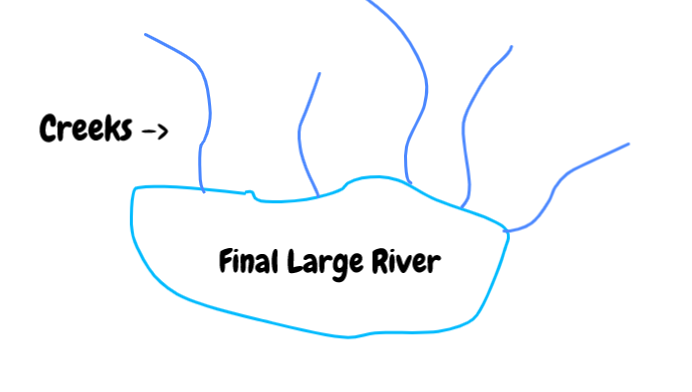

### Huffman Tree

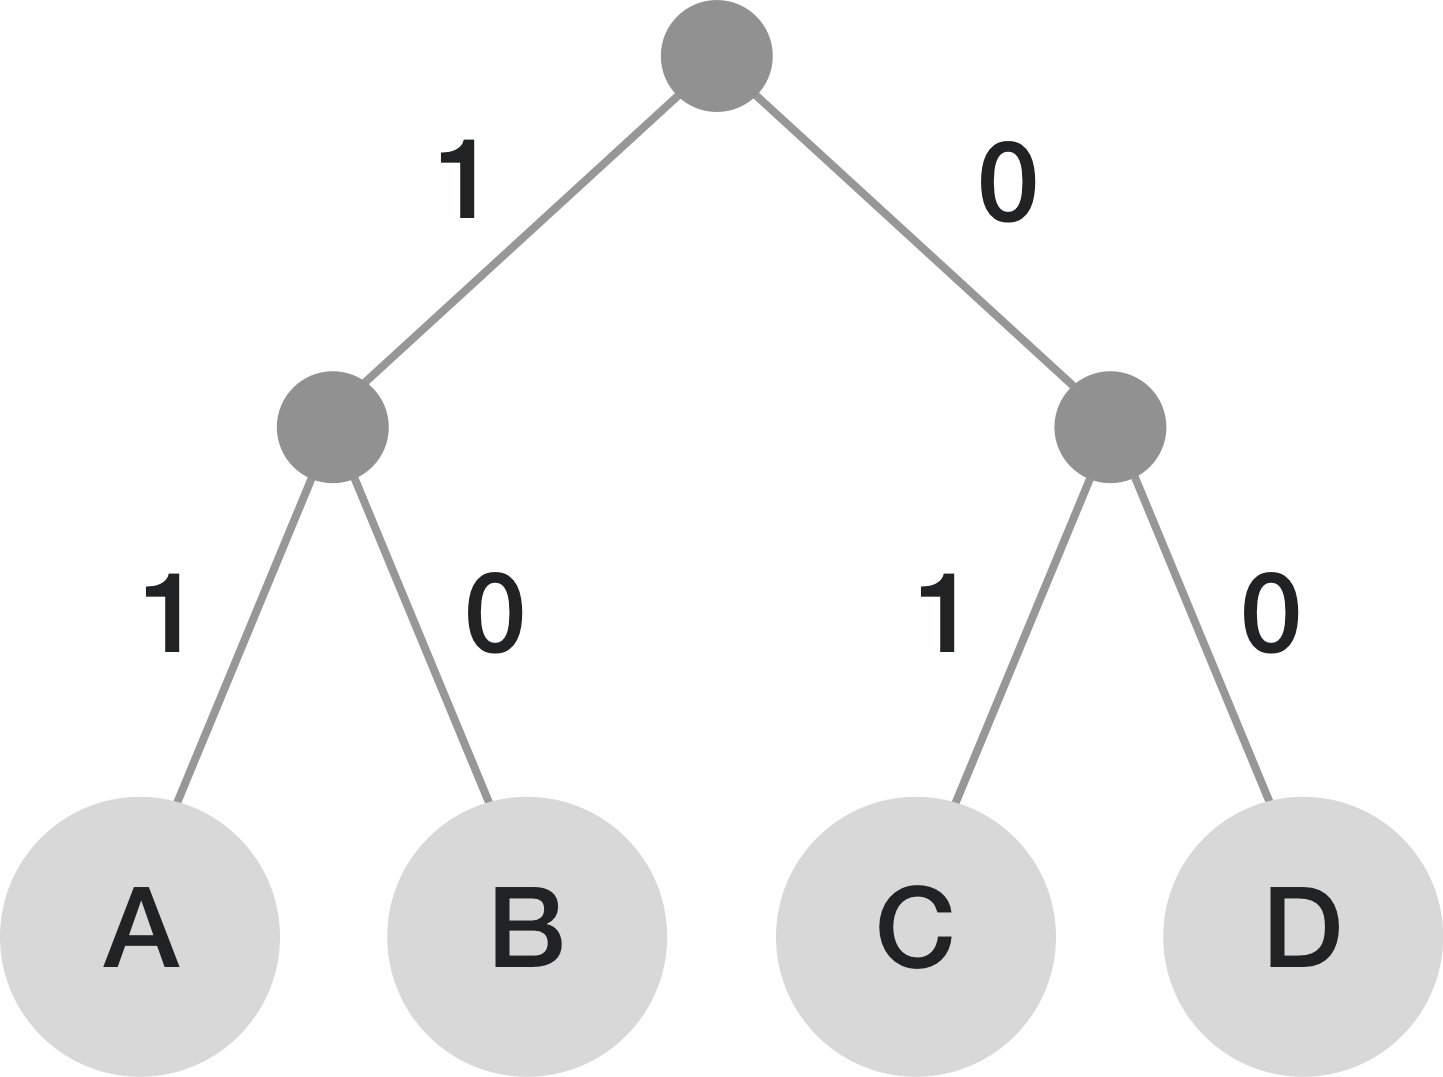

The Parent Node of the Huffman Tree is the River, each brach and after the river represents a creek. 

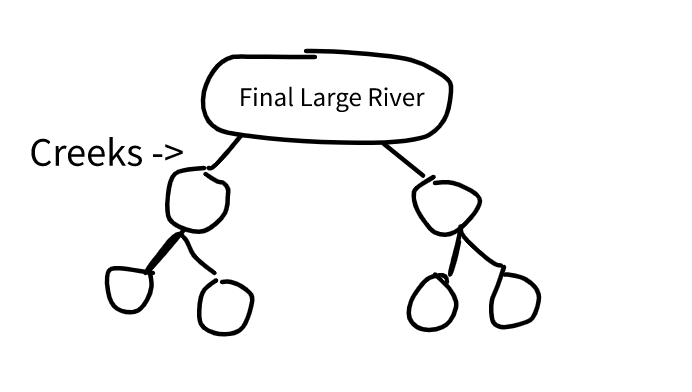